In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("./Housing.csv")
df.head(2)

,ID,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,1,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,2,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000


In [3]:
df.shape

(545, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  price             545 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


In [5]:
df.describe()

,ID,area,bedrooms,bathrooms,stories,parking,price
count,545.00000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,273.00000,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,157.47222,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1.00000,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,137.00000,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,273.00000,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,409.00000,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,545.00000,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [6]:
df.isna().sum()

ID                  0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(545, 14)

In [11]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
      dtype=object)

In [12]:
le = LabelEncoder()

In [13]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

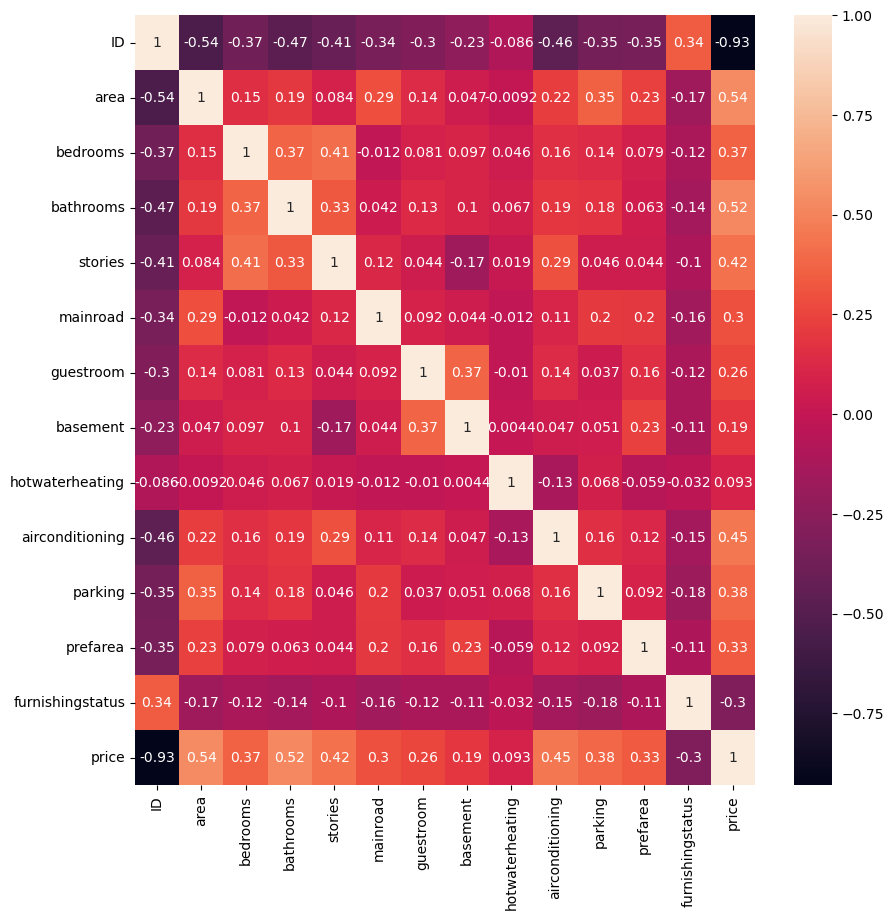

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df.head(2)

,ID,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,1,7420,4,2,3,1,0,0,0,1,2,1,0,13300000
1,2,8960,4,4,4,1,0,0,0,1,3,0,0,12250000


In [16]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [17]:
y.value_counts()

3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [21]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,-0.500735,0.025607,-0.563545,0.272416,1,0,0,0,0,0.492144,0,0
113,1.954229,0.025607,-0.563545,-0.915317,1,0,1,0,0,1.739673,1,0
325,-0.736621,1.421209,-0.563545,0.272416,1,0,0,0,1,-0.755384,0,1
66,3.518067,-1.369995,-0.563545,-0.915317,1,0,1,1,0,0.492144,0,0
479,-0.649256,1.421209,-0.563545,0.272416,0,0,0,0,0,-0.755384,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.556384,0.025607,1.243113,1.460149,1,0,0,0,1,-0.755384,1,0
132,0.023456,0.025607,-0.563545,1.460149,1,0,0,0,1,-0.755384,0,1
311,0.399127,-1.369995,-0.563545,-0.915317,1,0,1,0,0,0.492144,0,1
464,-0.282322,-1.369995,-0.563545,0.272416,1,0,0,1,0,0.492144,0,1


In [22]:
# Create a Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [23]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([ 76.77552149, 140.55300402,  89.69639518, 171.92931103,
        37.85478259, 167.75774637,  47.9963553 ,  46.49832567,
        55.9135197 , 201.97707119, 150.86631708,  71.04320436,
        69.84233145,  98.5003992 ,  73.57393681,   9.67291314,
        75.45094632,  62.0388559 ,  50.10660482,  93.23041205,
       127.41695752, 142.37166264,  95.95256289,  36.14580536,
       117.01884297, 127.50495296, 112.38370747, 121.35822143,
       115.157589  , 133.38471074,  51.00323969, 147.97625602,
       169.45959825,  39.09471451,  86.75507808, 103.31497536,
       103.90287464,  66.86358838,  43.21757672,  75.9462475 ,
       193.55537448,  94.40033235, 144.60312985,  60.73005752,
        66.23977675, 140.85265029,  92.93805107,  33.65019864,
        79.57508614, 154.16184095,  73.5010342 , 163.1083169 ,
        30.35549521,  41.60145646,  57.15775353, 107.60827275,
       166.35978516,  76.88620881,  39.80269856,  86.06637973,
       131.7480187 , 156.21442105,  45.25543465, 170.12

In [24]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.5697354506437733

In [25]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

24.684288946925705

In [26]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

64.88670466396678